In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv") 

In [3]:
# recordamos el DataFrame
df.head(2)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8


# Análisis de la relación entre variables numéricas y categóricas

En este apartado de la lección, casi todas las gráficas que vamos a usar ya las hemos aprendido a lo largo de la lección.

En este caso las preguntas que nos plantearemos para contestar son:

- ¿Cómo se distribuyen los ingresos en función del estado civil? Con esto podríamos ver si las personas casadas tienen más ingresos que las que están solteras. 

- ¿Existen diferencias notables en los ingresos entre diferentes estados civiles?

- ¿Cuál es el ingreso promedio para cada estado civil?
- ¿Los diferentes estados civiles muestran diferencias significativas en términos de ingresos promedio?


- ¿Cómo se superponen o difieren las distribuciones de ingresos entre diferentes estados civiles?

- ¿La relación entre ingresos y estado civil ha cambiado a lo largo del tiempo? (Puedes usar la variable "contact_year" para explorar esta relación a lo largo de los años).

- ¿Qué estadísticas descriptivas (como la media, mediana y desviación estándar) se pueden calcular para los ingresos en cada estado civil?

- ¿Cómo se distribuyen los ingresos en función del estado civil? ¿Hay valores atípicos?


En este caso, lo que haremos será crear un subplot con cuatro gráficas: 

- *boxplot*: Ya sabemos como es su sintaxis por lo que no nos extenderemos en su sintaxis.

- *violinplot*: Ya sabemos como es su sintaxis por lo que no nos extenderemos en su sintaxis.

- *barplot*: Es una gráfica nueva, por lo que vamos a pasar a entender su sintaxis. De este tipo de gráfica tendremos dos, una usando Matplotlib y otra Seaborn. 


Empezaremos contestando la siguiente pregunta:

> ¿Cómo se distribuyen los ingresos en función del estado civil? Con esto podríamos ver si las personas casadas tienen más ingresos que las que están solteras. 



📌 **NOTA SUPER IMPORTANTE**

Si bien cuando hacemos un *barplot* con Seaborn no hace falta que hagamos ningún calculo previo, en el caso de Matplotlib si que lo tendremos que hacer, al igual que hicimos con el *pieplot*. Por lo tanto, lo primero que haremos será calcular la media de edad para cada una de las categorías, para lo que usaremos un *groupby*

In [12]:
df_marital_matplt = df.groupby("marital")["income"].mean().reset_index()
df_marital_matplt

,marital,income
0,divorced,93684.009146
1,married,93240.390776
2,single,93066.954316


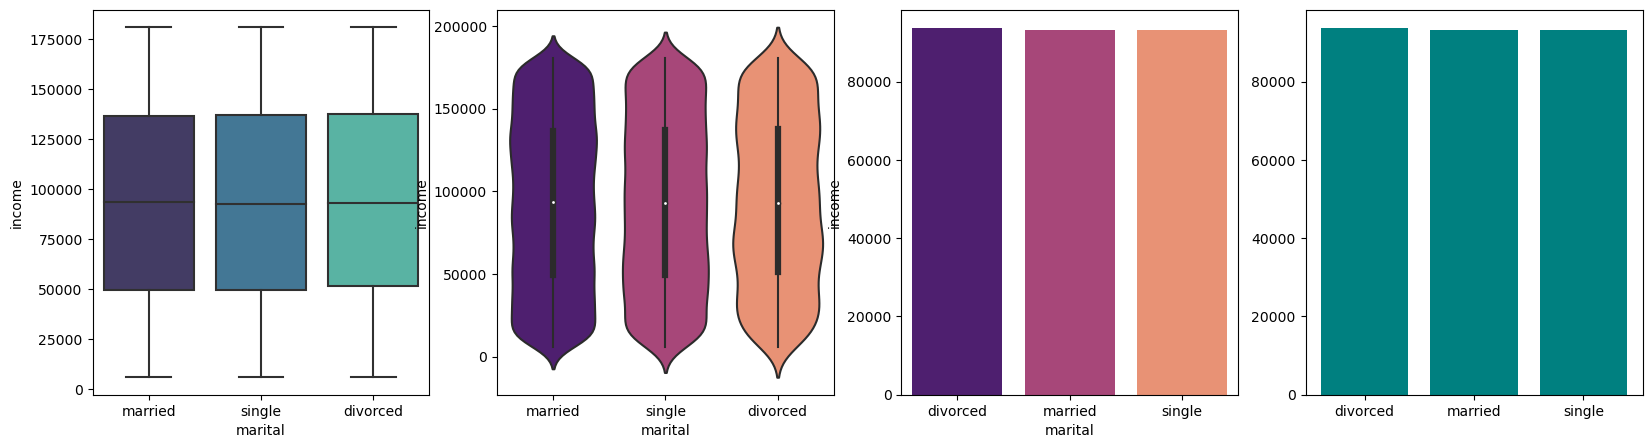

In [13]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "marital",
            y = "income", 
            data = df, 
            ax = axes[0], 
            palette= "mako")

# hacemos lo mismo para el violinplot
sns.violinplot(x = "marital", 
               y = "income", 
               data = df, 
               ax = axes[1], 
               palette = "magma")

# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "marital", 
            y = "income", 
            data = df_marital_matplt, 
            ax = axes[2], 
            palette = "magma")


# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
axes[3].bar(x = "marital", 
            height=  "income", 
            data = df_marital_matplt,
            color = "teal");

Quedan un par de detalles para tener la gráfica perfecta: 

1- En la última gráfica vemos que no hay nombre en el eje de las `x` ni de la `y`. Para solucionar esto, simplemente tendremos que usar el método `.set_xlabel()` y `.set_ylabel()`

2- Ciertas etiquetas de las gráficas se superponen, y hace que no se vea bien el nombre de los ejes. Para esto usaremos un nuevo método llamado `tigth_layout()`. Su objetivo principal es ajustar automáticamente los elementos en un gráfico o figura para que se ajusten adecuadamente dentro del área de la gráfica sin superponerse ni recortarse.


''

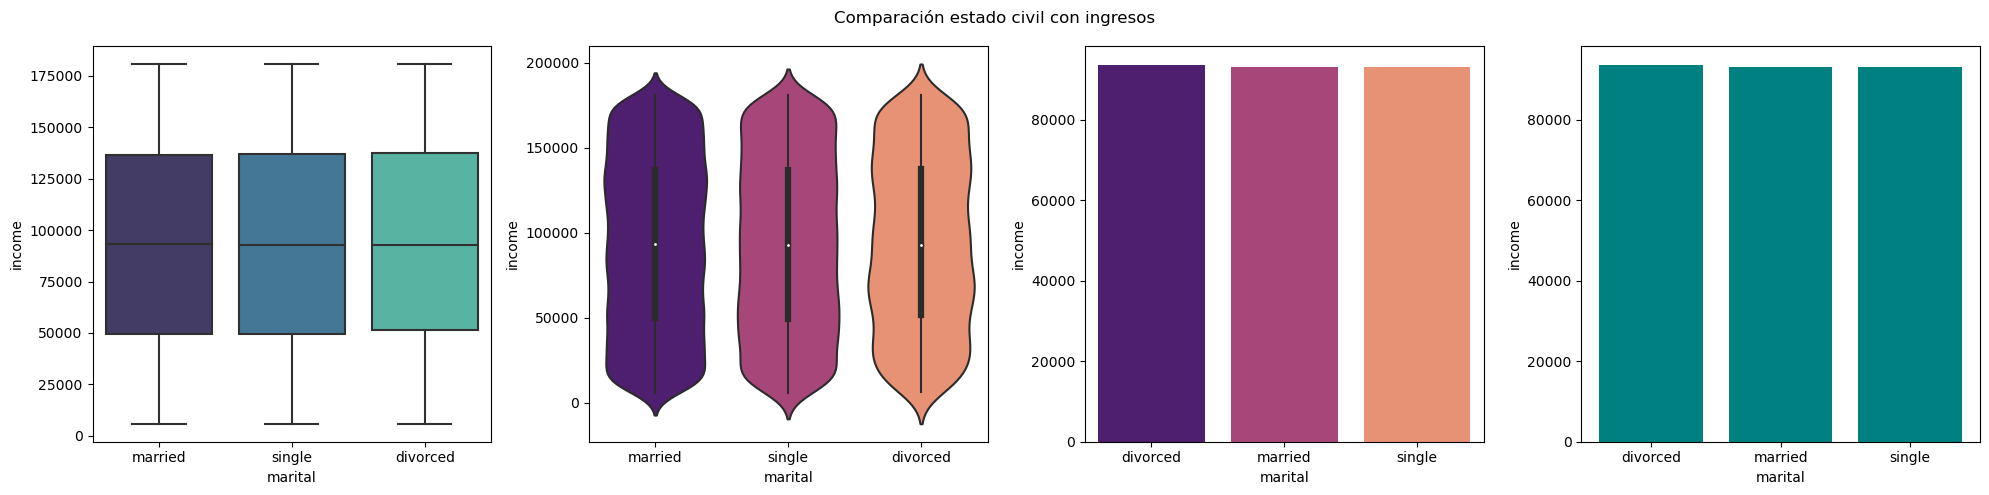

In [14]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

# creamos un boxplot, recordemos que en el caso de Seaborn para indicar en el subplot lo queremos tenemos que usar el parámetro 'ax' dentro del método de la función
# fijaos que la única diferencia con los boxplot que hemos creado previamente es que hemos añadido el parametro 'y' 
sns.boxplot(x = "marital", 
            y = "income", 
            data = df, 
            ax = axes[0], 
            palette= "mako")

# hacemos lo mismo para el violinplot
sns.violinplot(x = "marital", 
               y = "income", 
               data = df, 
               ax = axes[1], 
               palette = "magma")

# creamos nuestro primer barplot. 📌 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCIÓN DEL ESTADO CIVIL
sns.barplot(x = "marital", 
            y = "income", 
            data = df_marital_matplt,
            ax = axes[2], 
            palette = "magma")

# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
axes[3].bar(x = "marital", 
            height=  "income", 
            data = df_marital_matplt, 
            color = "teal")

# añadimos los nombres de los ejes a la última gráfica
axes[3].set_xlabel("marital")
axes[3].set_ylabel("income")


# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación estado civil con ingresos")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout();